In [1]:
%matplotlib notebook

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

/home/sukhjinder/anaconda/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/sukhjinder/anaconda/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/sukhjinder/anaconda/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/sukhjinder/anaconda/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/sukhjinder/anaconda/lib/python2.7/site-packages/pandas/core/i

## Loading the training data
The training data is loaded from file, categorical columns are converted into binary columns and numerical columns are scaled to [0-1] values.

In [5]:
train_data, train_labels, cols = load_data('data/KDDTrain+.csv')
train_data.head()

IOError: File data/KDDTrain+.csv does not exist

## Training
Now training the model and checking the accuracy on the training set:

In [5]:
bin_train_labels = train_labels.apply(lambda x: x if x =='normal' else 'anomaly')
clf = evaluate_kmeans(train_data, bin_train_labels)

kmean  label  
0      anomaly     9685
       normal     16087
1      anomaly     1960
       normal     48134
2      anomaly    12138
       normal      2959
3      anomaly    34847
       normal       163
dtype: int64
Total accuracy: 88.3%


## Test Set

Loading the test data set, passing the columns will map the test set to match the training columns

In [6]:
test_data, test_labels, cols = load_data('data/KDDTest+.csv', cols)
test_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,0.000016,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.000000,0.000005,0.000522,0,0.0,0.0,0.0,0.0,1,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.035606,0.001155,0.000000,0,0.0,0.0,0.0,0.0,1,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0.000000,0.000016,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.000017,0.000041,0.000218,0,0.0,0.0,0.0,0.0,1,0.0,...,0,0,0,0,0,0,0,0,1,0


Now to cluster the test data:

In [7]:
bin_test_labels = test_labels.apply(lambda x: x if x =='normal' else 'anomaly')
evaluate_kmeans(test_data, bin_test_labels, clf)

kmean  label  
0      anomaly    2741
       normal     2265
1      anomaly    3024
       normal     7357
2      anomaly    4809
       normal       82
3      anomaly    2259
       normal        6
dtype: int64
Total accuracy: 76.1%


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Observations
---

## Graph of Output

<IPython.core.display.Javascript object>


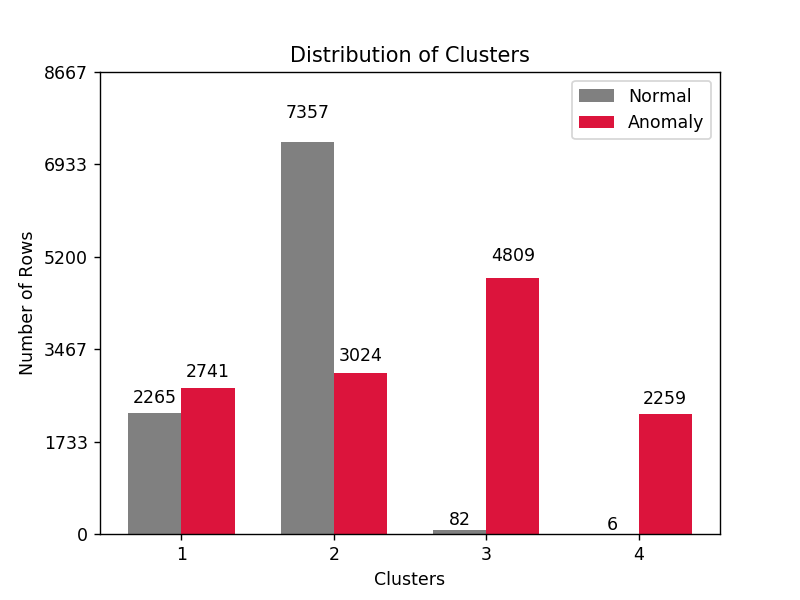

In [8]:
import matplotlib.pyplot as plt
import numpy as np

ind = np.arange(4)
width = .35
ans = get_results(test_data, bin_test_labels, clf)
normal = []
anom = []
bin_ans = ans.groupby(['kmean', 'label']).size()
roof = round(bin_ans.max(), -2) + 3000
for i in range(0,4):
    normal.append(bin_ans[i]['normal'])
    anom.append(bin_ans[i]['anomaly'])
fig, ax = plt.subplots()
rects1 = ax.bar(ind, normal, width, color='grey')
rects2 = ax.bar(ind + width, anom, width, color='crimson')
ax.set_ylabel('Number of Rows')
ax.set_title('Distribution of Clusters')
ax.set_yticks(np.arange(roof, step=roof/6))
ax.set_xlabel('Clusters')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1', '2', '3', '4'))
ax.legend((rects1[0], rects2[0]), ('Normal', 'Anomaly'))

def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1, ax)
autolabel(rects2, ax)

## Evaluation of Accuracy on Each Attack

In [9]:
ATTACKS = {
    'normal': 'normal',

    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',

    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',

    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}


clusters = ['normal' if norm > anom else 'anom' for anom, norm in zip(bin_ans[::2], bin_ans[1::2])]
categ_ans = ans
test_categ_labels = test_labels.apply(lambda x: ATTACKS[x])
categ_ans['label'] = test_categ_labels
categ_ans['kmean'] = categ_ans['kmean'].apply(lambda x: clusters[x])
categ_ans = categ_ans[categ_ans['label'] != 'normal']

print(categ_ans.groupby(['kmean', 'label']).size())
for label in categ_ans.label.unique():
    print('\n' + label)
    total = sum(categ_ans['label']==label)
    print('Total rows: {}'.format(total))
    correct = sum(categ_ans[categ_ans['label']==label]['kmean'] == 'anom')
    print('Percent correctly classified: {:.1%}\n'.format(correct/total))

kmean   label
anom    DoS      5995
        Probe    2418
        R2L      1250
        U2R       146
normal  DoS      1463
        Probe       3
        R2L      1504
        U2R        54
dtype: int64

DoS
Total rows: 7458
Percent correctly classified: 80.4%


R2L
Total rows: 2754
Percent correctly classified: 45.4%


Probe
Total rows: 2421
Percent correctly classified: 99.9%


U2R
Total rows: 200
Percent correctly classified: 73.0%



__Probe__ and __DoS__ have the highest accuracy, and __DoS__ also has the most representation in the test data. __U2R__ accuracy is reasonably high, however there were only 200 rows in the test data. __R2L__ had lackluster performance with _less than 50%_ accuracy. That's worse than guessing.